# Correlations

Calculate Pearson correlations between different cryptocurrencies.

In [1]:
import glob
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read 1 minute time bars

In [2]:
TIME_BAR_DIR = '/data/bars/TimeBar/60000'

In [3]:
from utils import read_bars

def read_prices(csv_file: str)->pd.Series:
    bars_df = read_bars(csv_file)
    prices = bars_df['volume_quote'] / bars_df['volume']
    filename = os.path.basename(csv_file)[len('TimeBar.60000.'):-len('.csv')]
    return prices.rename(filename)

In [4]:
def read_prices_all()->pd.DataFrame:
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Binance.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.BitMEX.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.OKEx.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Huobi.*.csv')
    csv_files = sorted(csv_files)
    prices_list = [read_prices(csv_file) for csv_file in csv_files]
    return pd.concat(prices_list, axis=1)

In [5]:
prices_df = read_prices_all()

In [6]:
prices_df

,Binance.Spot.ADA_USDT,Binance.Spot.ALGO_USDT,Binance.Spot.ATOM_USDT,Binance.Spot.BAT_USDT,Binance.Spot.BCH_USDT,Binance.Spot.BNB_USDT,Binance.Spot.BTC_USDT,Binance.Spot.DASH_USDT,Binance.Spot.EOS_USDT,Binance.Spot.ETC_USDT,...,OKEx.Swap.XLM_USD,OKEx.Swap.XLM_USDT,OKEx.Swap.XMR_USD,OKEx.Swap.XMR_USDT,OKEx.Swap.XRP_USD,OKEx.Swap.XRP_USDT,OKEx.Swap.XTZ_USD,OKEx.Swap.XTZ_USDT,OKEx.Swap.ZEC_USD,OKEx.Swap.ZEC_USDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-01 00:00:00+00:00,0.047536,NaN,2.733232,0.182705,250.126703,16.963980,8623.675337,80.799862,2.822040,6.442610,...,NaN,NaN,NaN,NaN,0.211285,0.211496,NaN,NaN,NaN,NaN
2020-05-01 00:01:00+00:00,0.047651,NaN,2.736913,0.183183,251.013058,17.010106,8654.621604,81.026721,2.831058,6.462196,...,NaN,NaN,NaN,NaN,0.212148,0.212126,NaN,NaN,NaN,45.55
2020-05-01 00:02:00+00:00,0.047573,NaN,2.735871,0.183077,250.581157,16.977130,8636.590532,80.938198,2.827869,6.456976,...,NaN,NaN,NaN,NaN,0.212119,0.212134,NaN,NaN,NaN,NaN
2020-05-01 00:03:00+00:00,0.047803,NaN,2.735112,0.183000,250.548033,16.983342,8637.423166,81.143685,2.825485,6.461116,...,NaN,NaN,NaN,NaN,0.212046,0.212191,NaN,NaN,NaN,NaN
2020-05-01 00:04:00+00:00,0.047954,NaN,2.741236,0.183622,250.348879,17.004654,8641.548493,81.145550,2.825659,6.460117,...,NaN,NaN,NaN,NaN,0.212296,0.212208,NaN,NaN,NaN,45.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:55:00+00:00,0.083186,NaN,2.598000,0.251900,222.467993,15.413509,9145.005528,NaN,2.370383,5.734200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30 23:56:00+00:00,0.083162,NaN,2.599000,NaN,222.381387,15.407478,9139.777388,NaN,2.368738,5.731511,...,NaN,NaN,NaN,NaN,NaN,0.175300,NaN,NaN,NaN,NaN
2020-06-30 23:57:00+00:00,0.083151,NaN,NaN,0.251601,222.306016,15.407602,9139.420730,NaN,2.368017,5.729000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot correlations between different trading pairs in the same exchange

In [7]:
def plot_corrs_in_exchange(exchange: str, market_type: str, width: int=16)->None:
    prefix = f'{exchange}.{market_type}.'
    df = prices_df.filter(regex=prefix)
    df.columns = [col[len(prefix):] for col in df.columns.values]

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(f'{exchange} {market_type}')

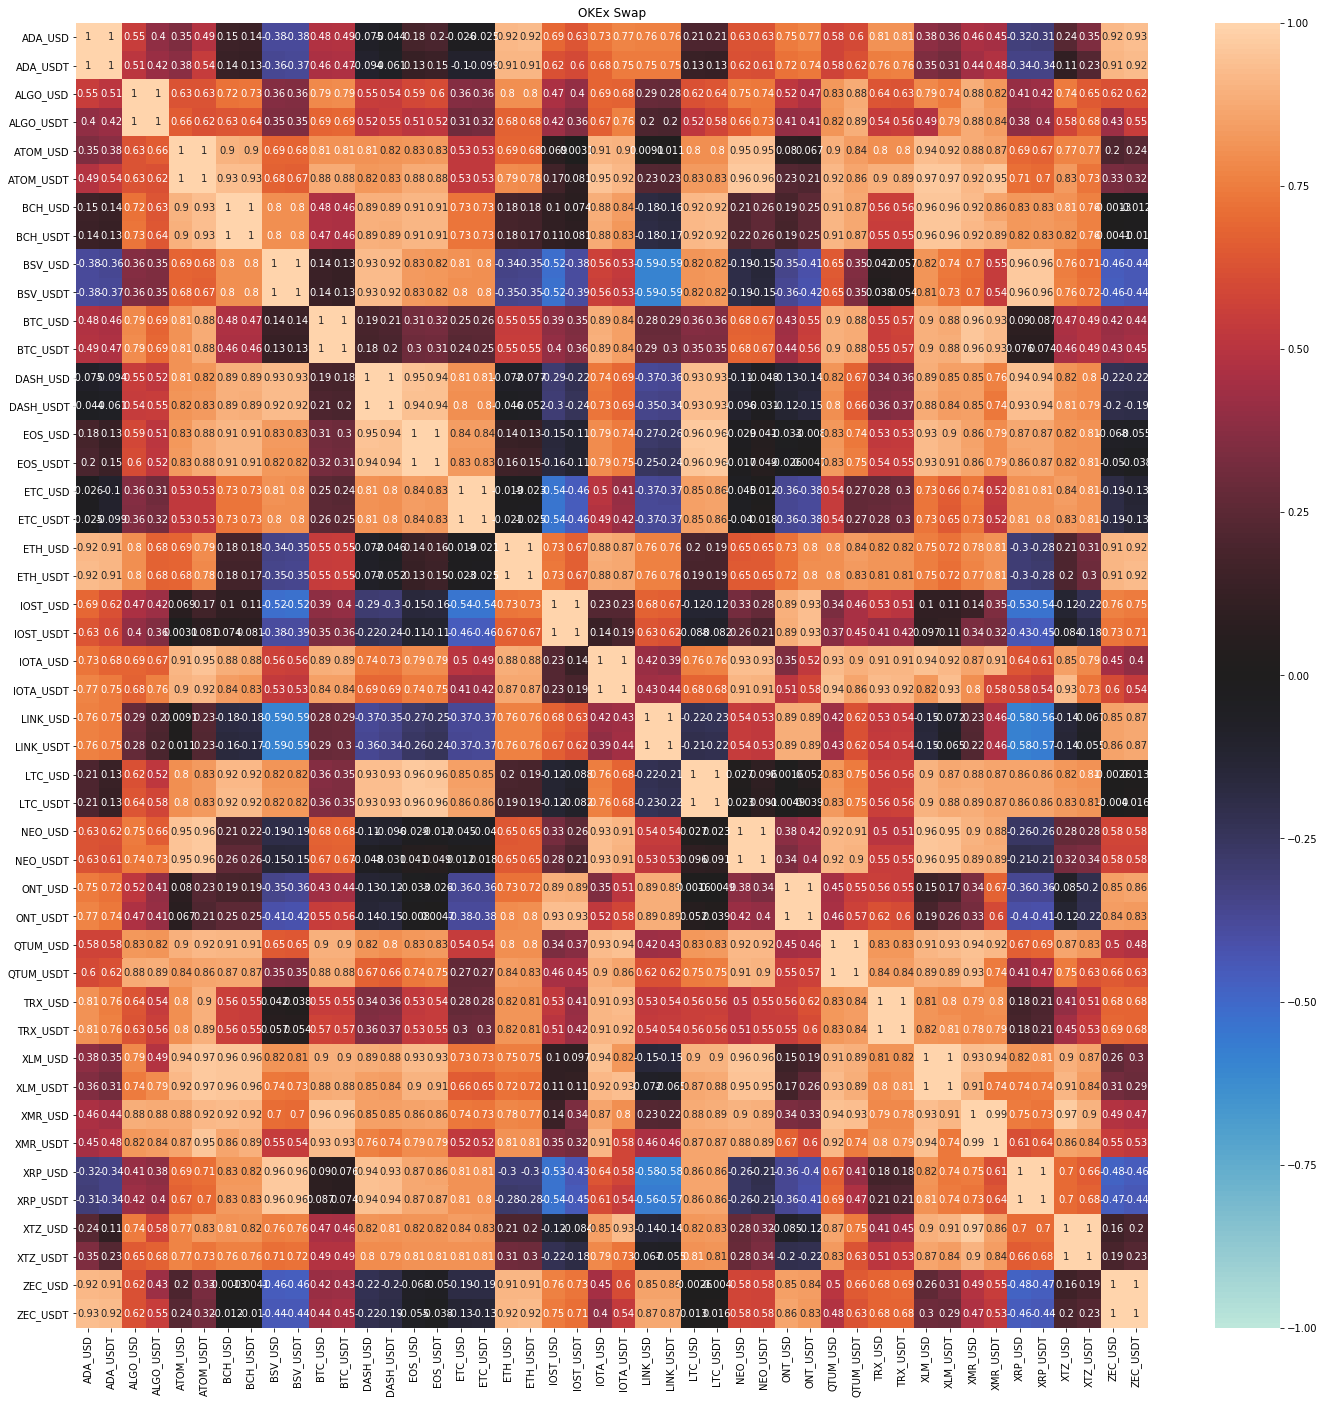

In [8]:
plot_corrs_in_exchange('OKEx', 'Swap', 24)

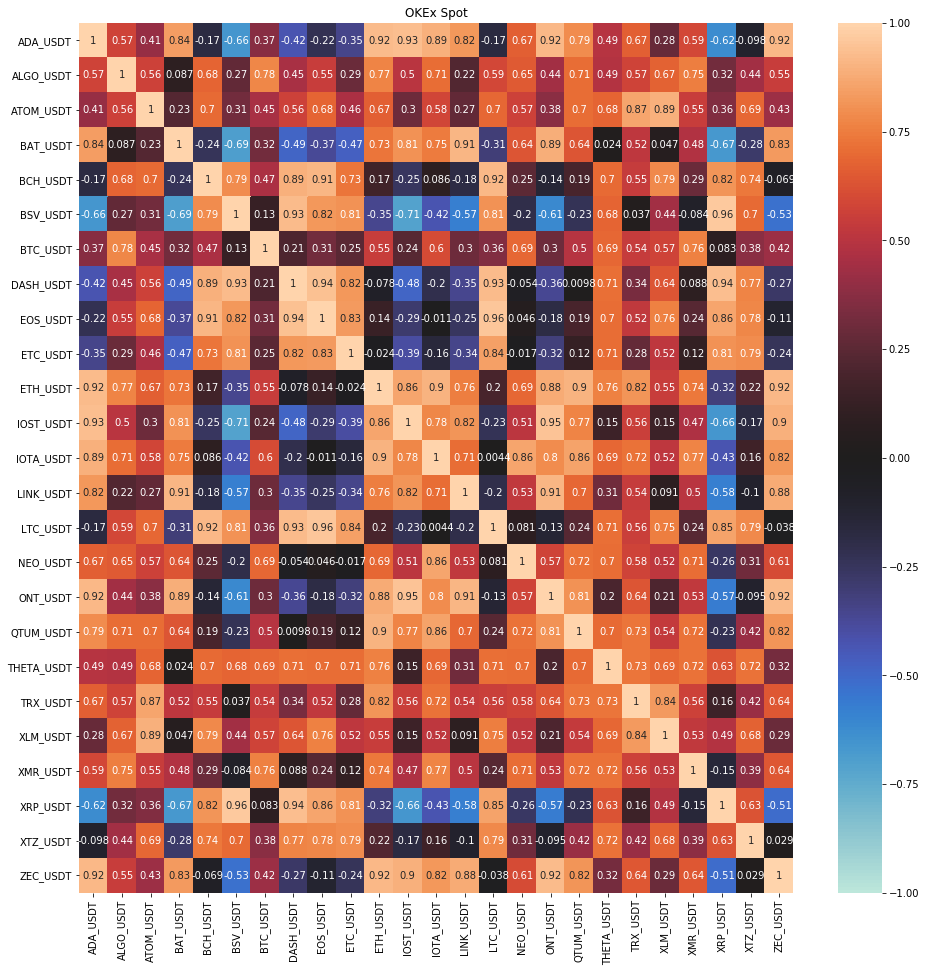

In [9]:
plot_corrs_in_exchange('OKEx', 'Spot')

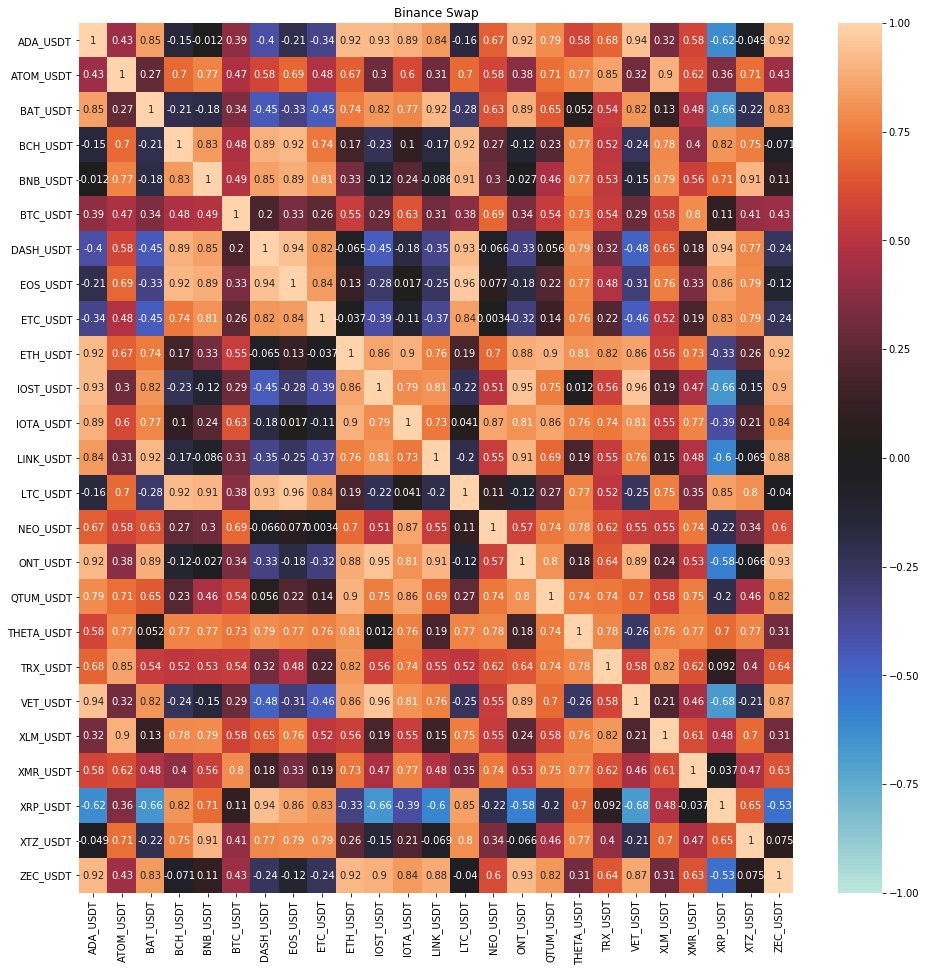

In [10]:
plot_corrs_in_exchange('Binance', 'Swap')

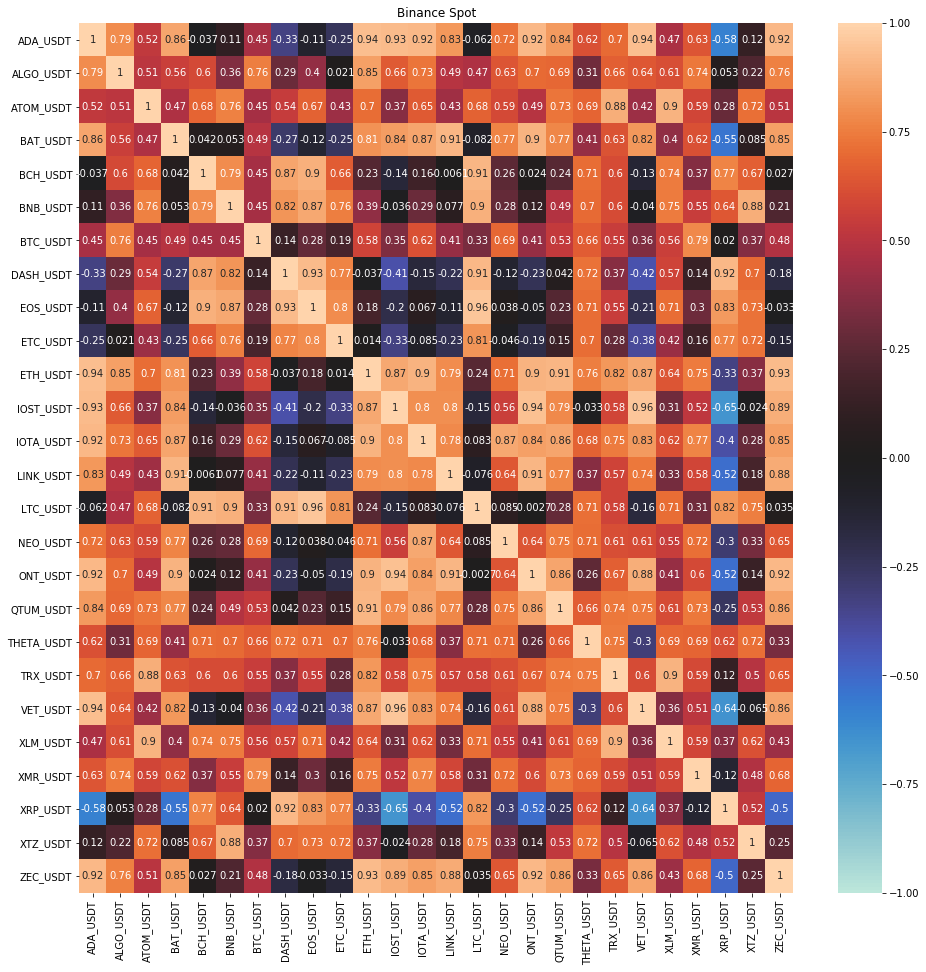

In [11]:
plot_corrs_in_exchange('Binance', 'Spot')

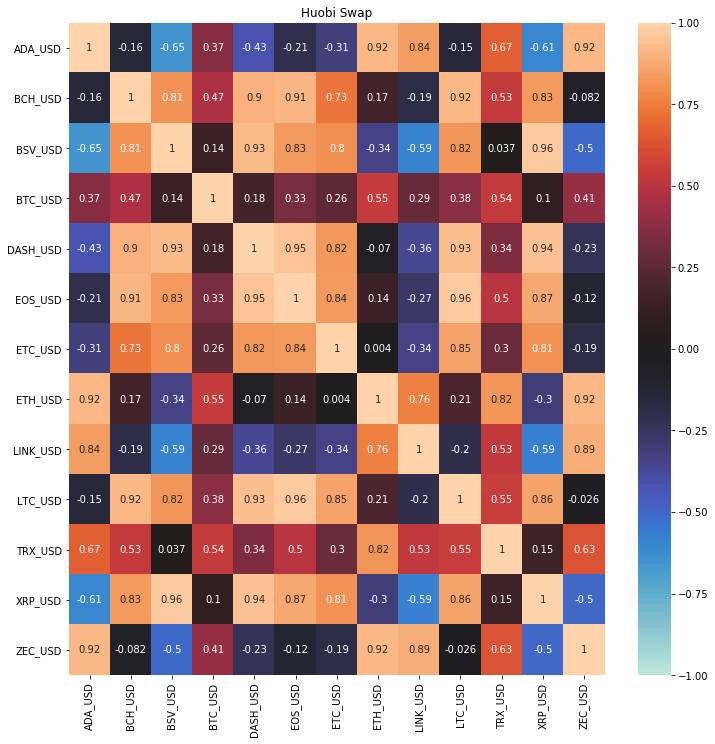

In [12]:
plot_corrs_in_exchange('Huobi', 'Swap', 12)

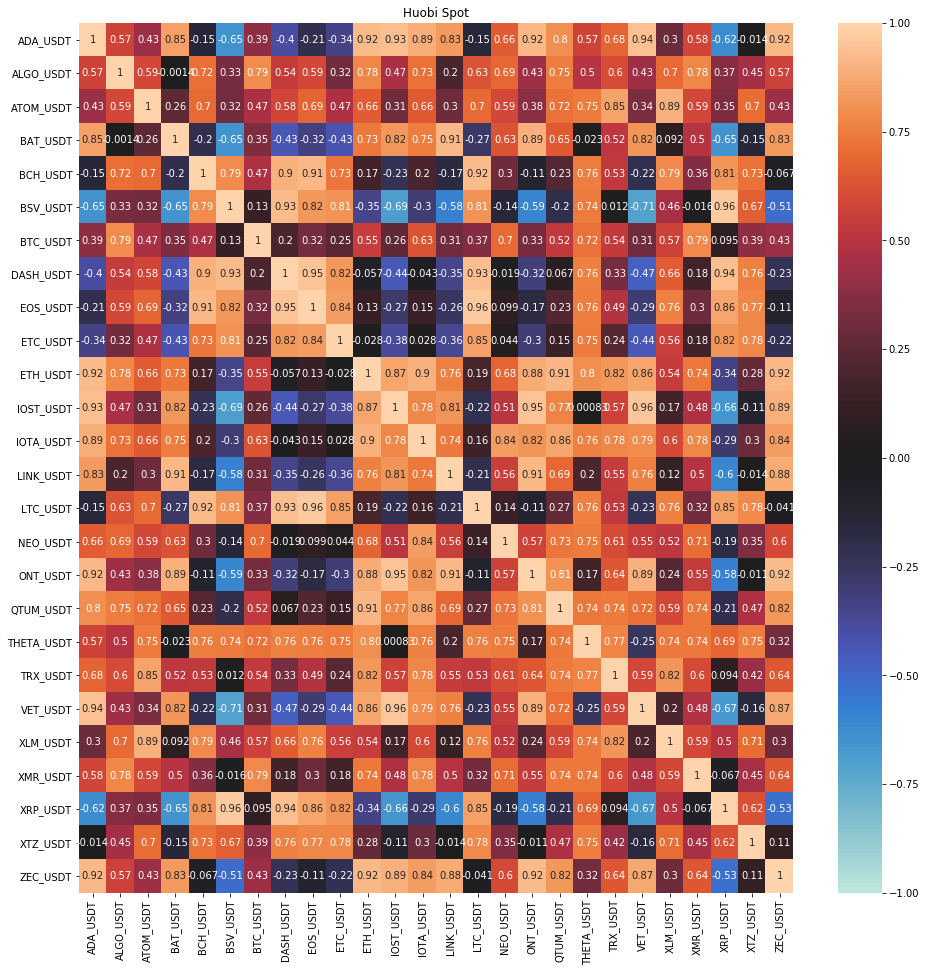

In [13]:
plot_corrs_in_exchange('Huobi', 'Spot')

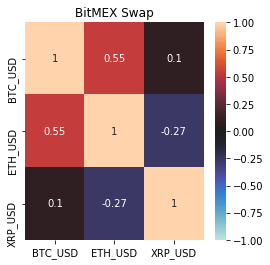

In [14]:
plot_corrs_in_exchange('BitMEX', 'Swap', 4)

## Plot correlations between different exchanges for the same pair

In [15]:
def plot_corrs_cross_exchanges(base: str, width: int=8)->None:
    df = prices_df.filter(regex=f'{base}_USD')

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(base)

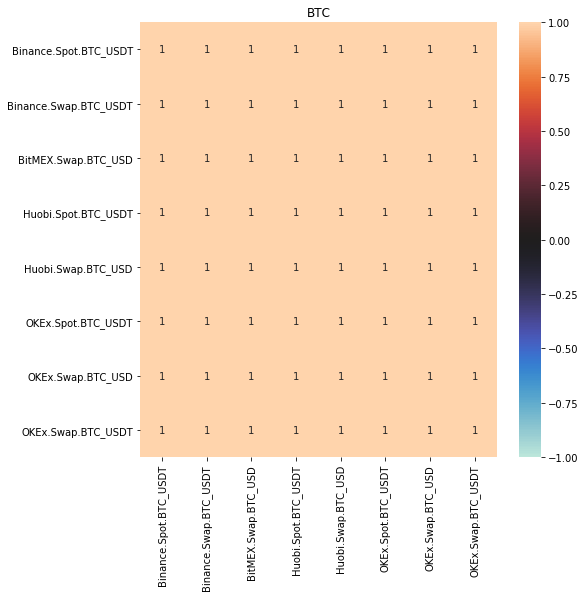

In [16]:
plot_corrs_cross_exchanges('BTC')

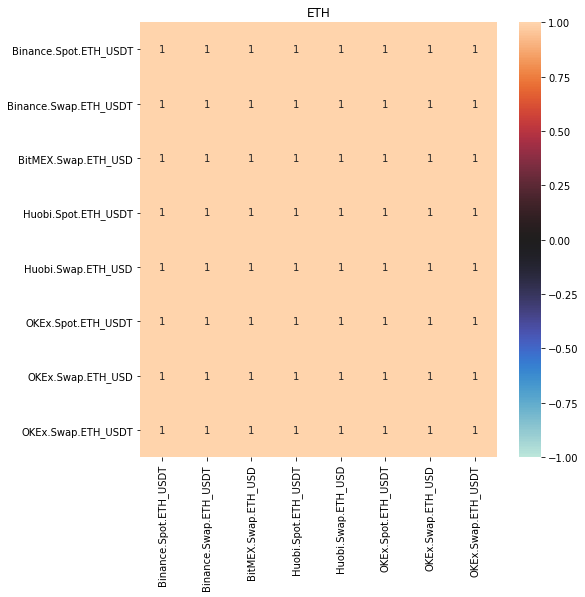

In [17]:
plot_corrs_cross_exchanges('ETH')

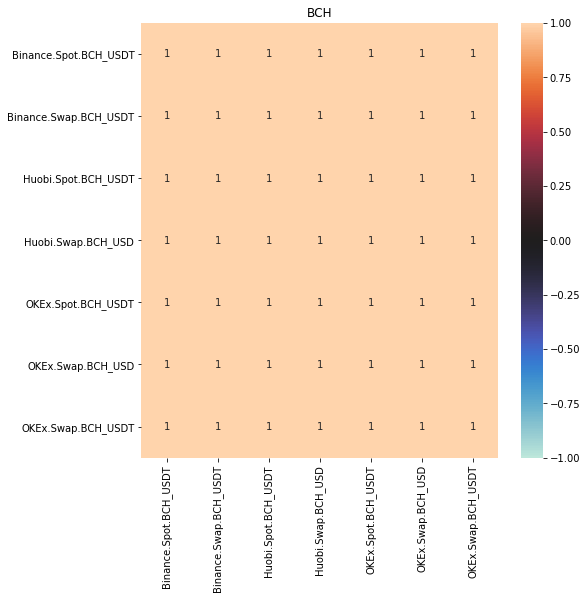

In [18]:
plot_corrs_cross_exchanges('BCH')

We can see that same trading pairs are highly synchronized between different exchanges.

## Sorting by correlations with BTC

In [19]:
prices_df.corr()['BitMEX.Swap.BTC_USD'].sort_values(ascending=False)[0:20]

BitMEX.Swap.BTC_USD      1.000000
OKEx.Swap.BTC_USD        0.999933
Huobi.Swap.BTC_USD       0.999914
Binance.Swap.BTC_USDT    0.999711
OKEx.Swap.BTC_USDT       0.999683
Binance.Spot.BTC_USDT    0.999667
OKEx.Spot.BTC_USDT       0.999659
Huobi.Spot.BTC_USDT      0.999622
OKEx.Swap.XMR_USD        0.957069
OKEx.Swap.XMR_USDT       0.928427
OKEx.Swap.QTUM_USD       0.896683
OKEx.Swap.XLM_USD        0.895897
OKEx.Swap.IOTA_USD       0.891417
OKEx.Swap.XLM_USDT       0.880854
OKEx.Swap.QTUM_USDT      0.878231
OKEx.Swap.ATOM_USDT      0.877026
OKEx.Swap.IOTA_USDT      0.842261
Binance.Swap.XMR_USDT    0.821586
Huobi.Spot.XMR_USDT      0.812813
Binance.Spot.XMR_USDT    0.811103
Name: BitMEX.Swap.BTC_USD, dtype: float64